論文  
https://arxiv.org/abs/2112.10752<br>
<br>
GitHub  
https://github.com/nateraw/stable-diffusion-videos<br>
<br>
<a href="https://colab.research.google.com/github/kaz12tech/ai_demos/blob/master/StableDiffusion_videos_demo.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境セットアップ

## GPU確認

In [ ]:
!nvidia-smi

## GitHubからコード取得

## ライブラリのインストール

In [ ]:
%cd /content

!pip install stable_diffusion_videos[realesrgan]

## Access Token取得
[Huggingface](https://huggingface.co/)にSign Up後メール認証<br>
その後、[CompVis/stable-diffusion-v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4)にアクセスし以下に同意<br>
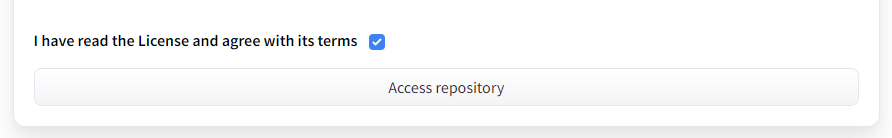
<br><br>
その後、Settings → Access Token
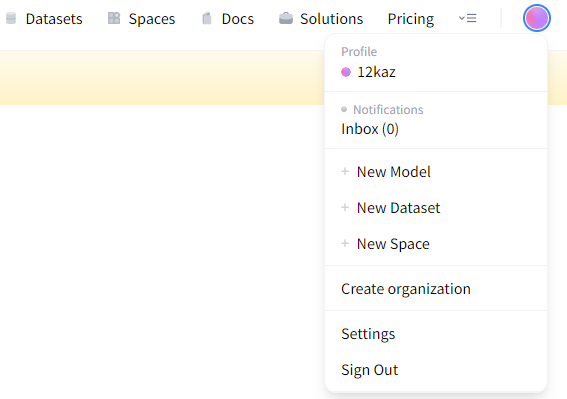


In [ ]:
access_tokens="ここに取得したAccess Tokenを記載" # @param {type:"string"}

## ライブラリのインポート

In [ ]:
import torch
from stable_diffusion_videos import StableDiffusionWalkPipeline, Interface
from IPython.display import HTML
from base64 import b64encode

# 学習済みモデルのロード

In [ ]:
model_id = "CompVis/stable-diffusion-v1-4"

pipeline = StableDiffusionWalkPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    revision="fp16",
    use_auth_token=access_tokens
).to("cuda")

interface = Interface(pipeline)

# Utility関数定義

In [ ]:
def visualize_video_colab(video_path):
  """動画をインライン表示"""
  mp4 = open(video_path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
    <video width=400 controls>
        <source src="%s" type="video/mp4">
    </video>
  """ % data_url)

# Text to Video

In [ ]:
interface.launch(debug=True)

## Settings

In [ ]:
# @markdown src prompt
prompt1 = "A beautiful japanese landscape with dead trees, apocalyptic style, Simon Stlenhag, 4k, ultrarealistic, octane render, volumetric lighting" # @param {type:"string"}
# @markdown dst prompt
prompt2 = "A beautiful japanese landscape with sakura trees, apocalyptic style, Simon Stlenhag, 4k, ultrarealistic, octane render, volumetric lighting" # @param {type:"string"}

# @markdown seeds
seed1 = 12 #@param {type:"integer"}
seed2 = 1212 #@param {type:"integer"}

# @markdown FPS
fps = 10 #@param {type:"integer"}

# @markdown number of interpolation steps
num_interpolation_steps = 20 #@param {type:"integer"}

# @markdown video size
height = "512" #@param [64, 128, 256, 512, 640, 712]
width = "712" #@param [64, 128, 256, 512, 640, 712]

## Inference

In [ ]:
video_path = pipeline.walk(
    [prompt1, prompt2],
    [seed1, seed2],
    fps=fps,                      
    num_interpolation_steps=num_interpolation_steps,
    height=int(height),                
    width=int(width),                  
)

In [ ]:
visualize_video_colab(video_path)